<a id = 'toc'></a>
# Table of contents

- ### [Decision Tree Classifier](#5.1)
- ### [Visualizing Decision Tree partition](#5.2)
- ### [Bagging](#5.3)
- ### [Random Forest](#5.4)

<a id = '5.1'></a>
# Decision Tree Classifier

### Dataset description

The banknote dataset involves predicting whether a given banknote is authentic given a number of measures taken from a photograph.

### Features of the dataset
- **Variance** of Wavelet Transformed image (continuous).
- **Skewness** of Wavelet Transformed image (continuous).
- **Kurtosis** of Wavelet Transformed image (continuous).
- **Entropy** of image (continuous).
- **Class** (integer).

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_validate 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, mean_squared_error

from sklearn.tree import export_graphviz
from graphviz import Source

### Access Dataset

In [2]:
df = pd.read_csv('Upload/5.2.bill.csv')

print(f'Number of Rows: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

df.info()

Number of Rows: 1372
Number of Features: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [3]:
duplicated = df.duplicated()
print(f'Number of duplicated data: {df[duplicated == True].shape[0]}')

Number of duplicated data: 24


In [4]:
print(f"Number of Authenticated Banknotes: {df[df['Class'] == 1].shape[0]}")
print(f"Number of Unauthenticated Banknotes: {df[df['Class'] == 0].shape[0]}")

Number of Authenticated Banknotes: 610
Number of Unauthenticated Banknotes: 762


Correlation:
Class       1.000000
Curtosis    0.155883
Entropy    -0.023424
Skewness   -0.444688
Variance   -0.724843
Name: Class, dtype: float64


<Axes: >

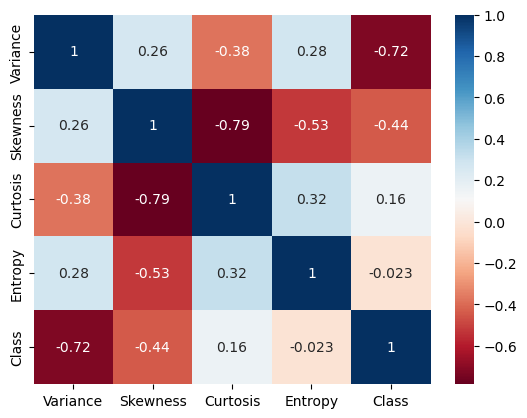

In [5]:
print('Correlation:')
print(df.corr()['Class'].sort_values(ascending = False))
sns.heatmap(df.corr(), cmap = 'RdBu', annot = True)

### Data Visualization

<Axes: xlabel='Entropy', ylabel='Count'>

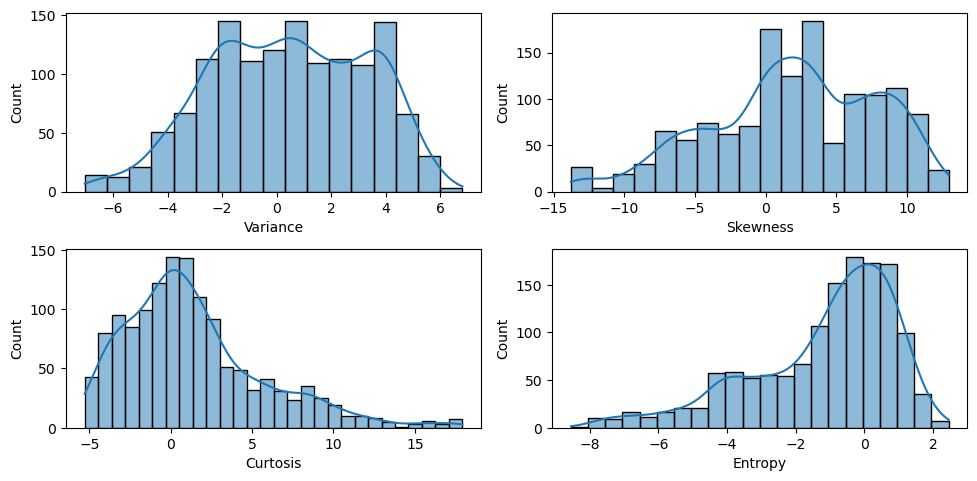

In [6]:
fig, axes = plt.subplots(2, 2, figsize = (10, 5))
fig.tight_layout(pad=2.0)

sns.histplot(data = df, x = 'Variance', kde = True, ax = axes[0, 0])
sns.histplot(data = df, x = 'Skewness', kde = True, ax = axes[0, 1])
sns.histplot(data = df, x = 'Curtosis', kde = True, ax = axes[1, 0])
sns.histplot(data = df, x = 'Entropy', kde = True, ax = axes[1, 1])

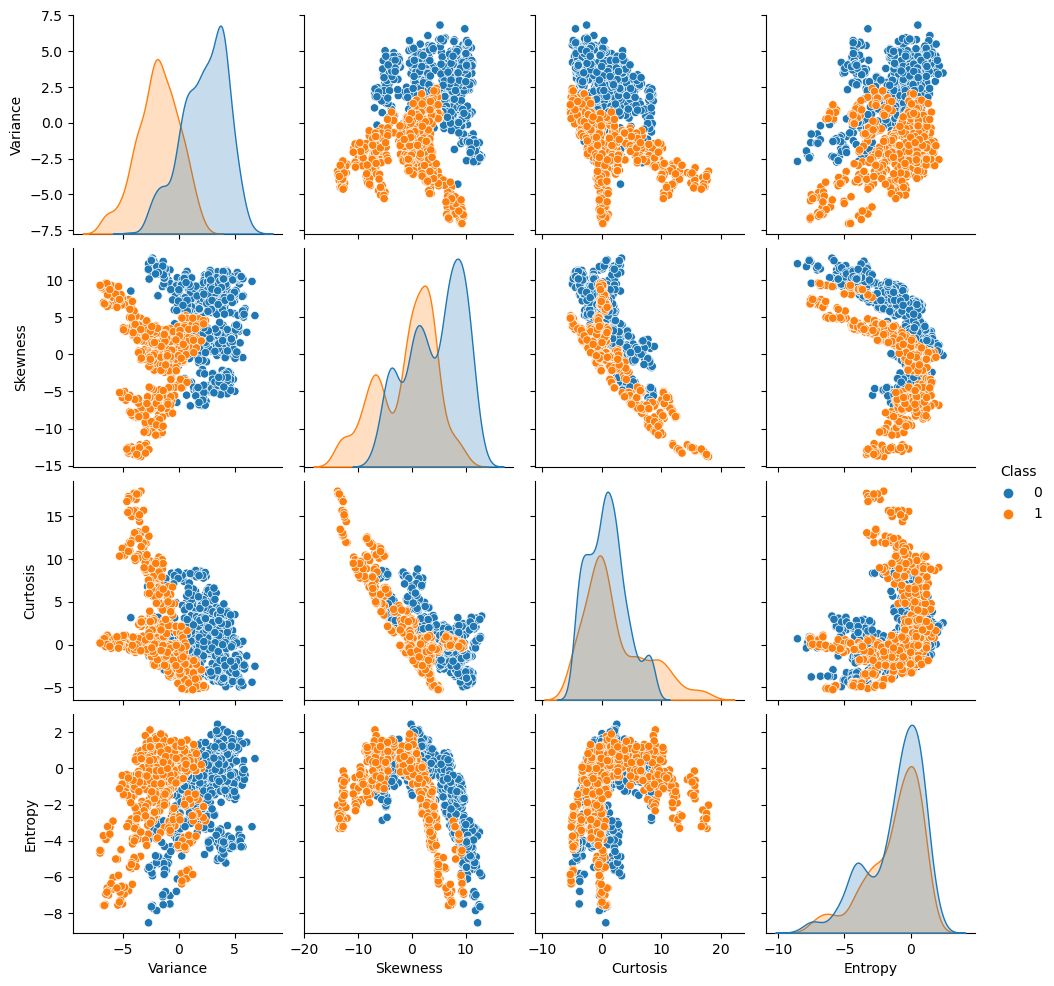

In [7]:
sns.pairplot(df, kind = 'scatter', hue = 'Class')

### DecisionTreeClassifier

In [13]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, y
                                                    , test_size = .3
                                                    , random_state = 11)

clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [10]:
# export_graphviz(clf, out_file = "clf_tree.dot", feature_names=['Variance', 'Skewness', 'Curtosis', 'Entropy']
#                 , class_names='Class', rounded=True, filled=True, proportion = True)

# Source.from_file("clf_tree.dot")

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       232
           1       0.97      0.98      0.98       180

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412

RMSE: 0.15


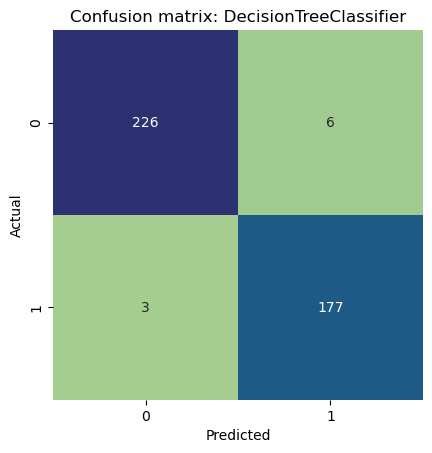

In [23]:
print('Classification report:')
print(classification_report(y_test, y_pred))
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
sns.heatmap(confusion_matrix(y_test, y_pred)
            , annot = True
            , cmap ='crest'
            , cbar = False
            , fmt = '.0f'
            , square = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix: DecisionTreeClassifier');

#### Adding some additional parameters for small sample size 
- max_depth
- max_features
- min_samples_leaf

Use cross-validation to check for overfitting.

Splits: 5
[train] F1-Score: 0.92 +/- 0.02
[test] F1-Score: 0.91 +/- 0.03


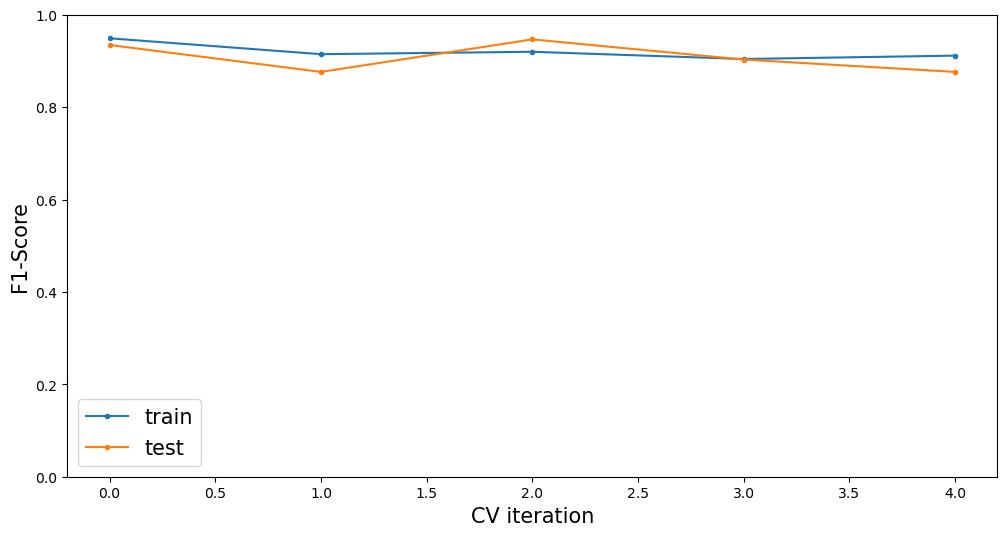

In [12]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

sss = StratifiedShuffleSplit(n_splits = 5
                            , test_size = .3
                            , random_state = 11)

print(f'Splits: {sss.get_n_splits(X, y)}')

clf = DecisionTreeClassifier(max_depth = 3
                             , max_features = 2
                             , min_samples_leaf = 4
                             , random_state = 17)

cv_metrics = cross_validate(clf, X, y
                            , cv = sss
                            , scoring = 'f1_micro'
                            , return_train_score = True)

def plot_cv_metrics(cv_metrics):
    avg_f1_train, std_f1_train = cv_metrics['train_score'].mean(), cv_metrics['train_score'].std()
    avg_f1_test, std_f1_test = cv_metrics['test_score'].mean(), cv_metrics['test_score'].std()
    print(f'[train] F1-Score: {avg_f1_train:.2f} +/- {std_f1_train:.2f}')
    print(f'[test] F1-Score: {avg_f1_test:.2f} +/- {std_f1_test:.2f}')
    
    plt.figure(figsize = (12, 6))
    
    plt.plot(cv_metrics['train_score'], label = 'train', marker = '.')
    plt.plot(cv_metrics['test_score'], label = 'test', marker = '.')
    
    plt.ylim([0., 1.])
    plt.xlabel('CV iteration', fontsize = 15)
    plt.ylabel('F1-Score', fontsize = 15)
    plt.legend(fontsize = 15)
    
    plt.show()
    
plot_cv_metrics(cv_metrics)

[UP](#toc)

<a id = '5.2'></a>
# Visualizing Decision Tree partition

### Dataset description

Generated random n-class classification problem.

In [30]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, tree
from sklearn.datasets import make_classification

import numpy as np
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Data generation

In [31]:
classification_problem = datasets.make_classification(n_features = 2
                                                      , n_informative = 2, 
                                                      n_classes = 3
                                                      , n_redundant=0
                                                      , n_clusters_per_class=1
                                                      , random_state=3)

In [32]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

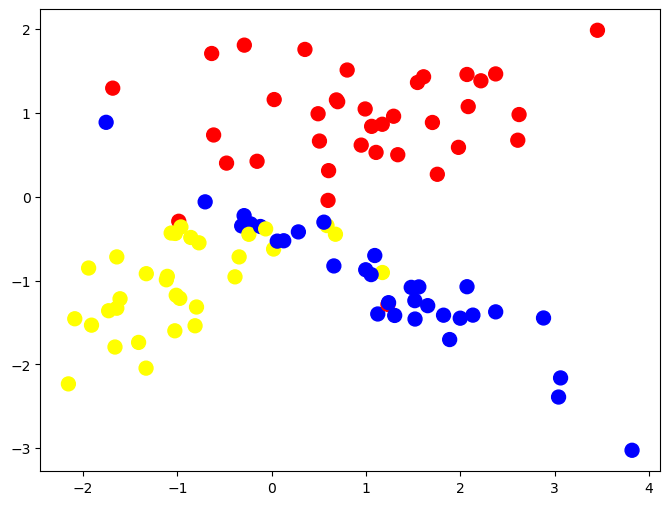

In [33]:
pylab.figure(figsize=(8,6))
pylab.scatter(list(map(lambda x: x[0]
                       , classification_problem[0]))
              , list(map(lambda x: x[1]
                         , classification_problem[0])), 
              c=classification_problem[1], cmap=colors, s=100)

In [117]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_problem[0], 
                                                 classification_problem[1], 
                                                 test_size = 0.3,
                                                 random_state = 1)

### DecisionTreeClassifier

In [118]:
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_labels)

predictions = clf.predict(test_data)
print(f'Accuracy: {round(accuracy_score(test_labels, predictions), 2)}')

predictions

Accuracy: 0.77


array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0,
       2, 0, 0, 0, 2, 1, 2, 0])

### Separating surface

In [119]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step)
                       , np.arange(y_min, y_max, step))

In [120]:
def plot_decision_surface(estimator, train_data, train_labels
                          , test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()]
                                                 )).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1]
                   , c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(
        metrics.accuracy_score(train_labels
                               , estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1]
                   , c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(
        metrics.accuracy_score(test_labels, estimator.predict(test_data))))

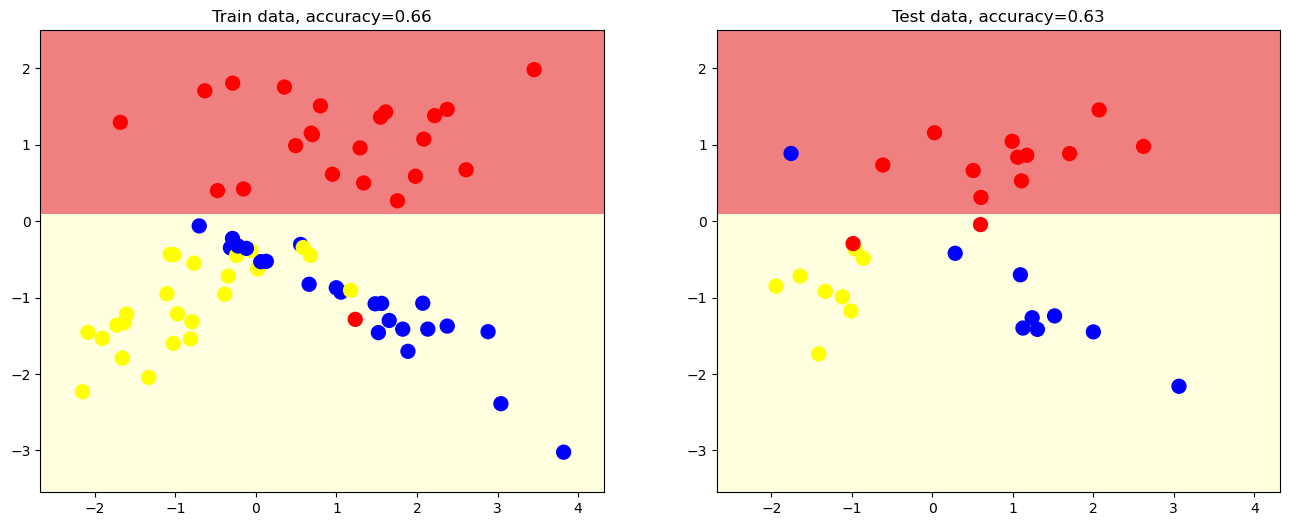

In [121]:
clf = tree.DecisionTreeClassifier(random_state = 1, max_depth = 1)

plot_decision_surface(clf, train_data, train_labels
                      , test_data, test_labels)

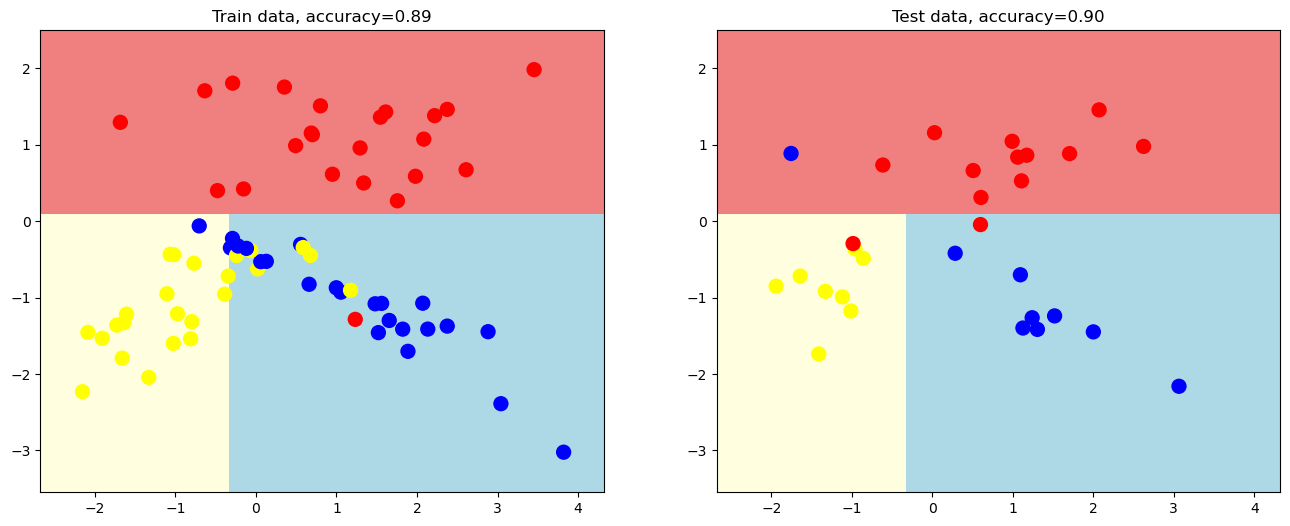

In [122]:
clf = tree.DecisionTreeClassifier(random_state = 1, max_depth = 2)

plot_decision_surface(clf, train_data, train_labels
                      , test_data, test_labels)

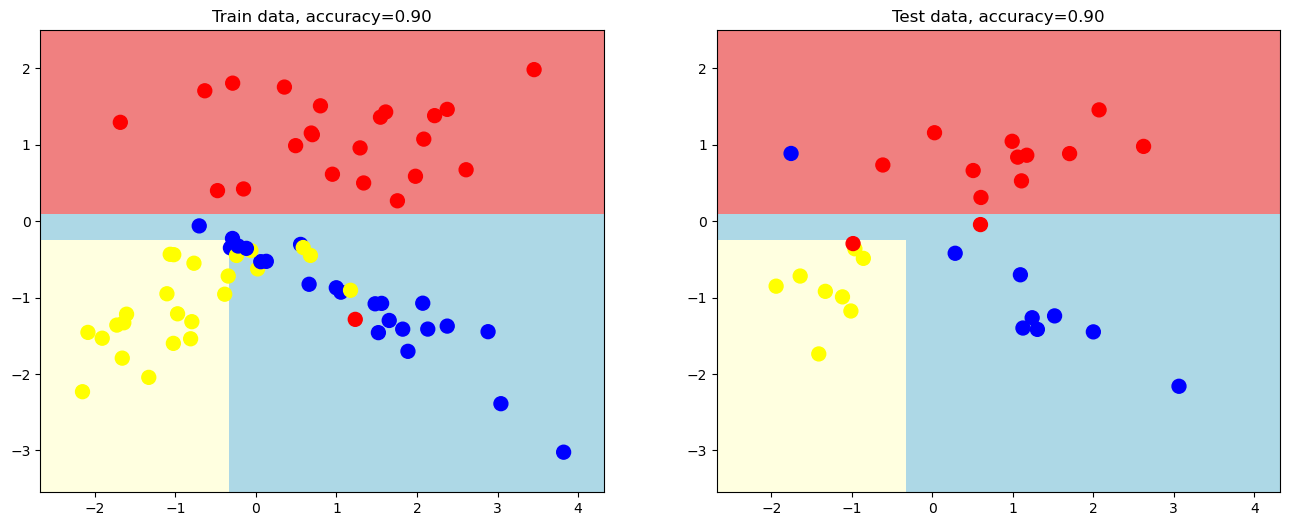

In [123]:
clf = tree.DecisionTreeClassifier(random_state = 1, max_depth = 3)

plot_decision_surface(clf, train_data, train_labels
                      , test_data, test_labels)

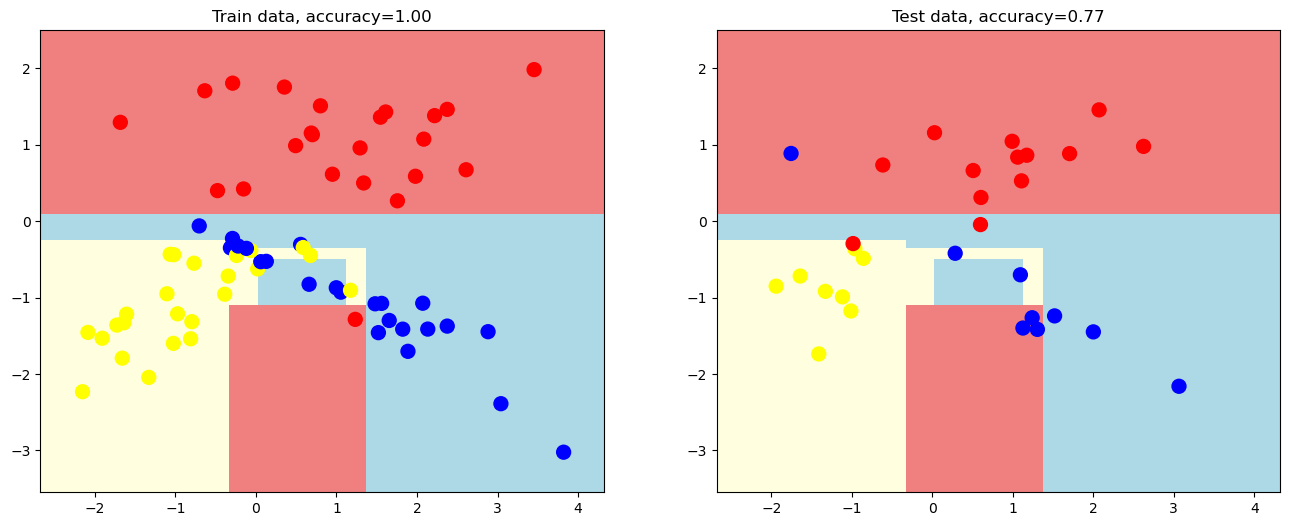

In [124]:
clf = tree.DecisionTreeClassifier(random_state = 1)

plot_decision_surface(clf, train_data, train_labels
                      , test_data, test_labels)

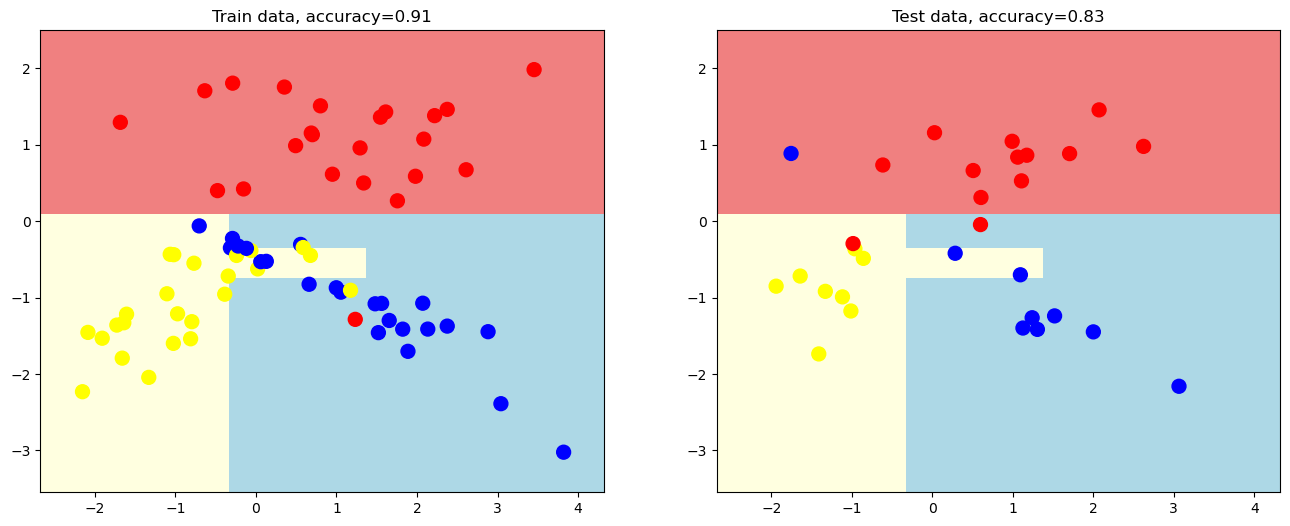

In [130]:
clf = tree.DecisionTreeClassifier(random_state = 1, min_samples_leaf = 4)

plot_decision_surface(clf, train_data, train_labels
                      , test_data, test_labels)

[UP](#toc)

<a id = '5.3'></a>
# Bagging

### Dataset description

These dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

### Features of the dataset

- **fixed acidity**
- **volatile acidity**
- **citric acid**
- **residual sugar**
- **chlorides**
- **free sulfur dioxide**
- **total sulfur dioxide**
- **density**
- **pH**
- **sulphates**
- **alcohol**
- **quality** (score between 0 and 10)

In [87]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score

In [88]:
df = pd.read_csv('Upload/5.5.wine.csv', sep = ';')

df['quality'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, y
                                                    , test_size = .3
                                                    , random_state = 11)

### LogisticRegression

In [89]:
scaler = RobustScaler()
x_train_logistic = scaler.fit_transform(x_train)

logistic_model = LogisticRegression()
logistic_model.fit(x_train_logistic, y_train)
logistic_y = logistic_model.predict(x_test)

### DecisionTreeClassifier

In [90]:
tree_clf_model = DecisionTreeClassifier(max_depth = 10
                                    , random_state = 11)
tree_clf_model.fit(x_train, y_train)
tree_clf_y = tree_clf_model.predict(x_test)

### DecisionTreeRegressor

In [91]:
tree_reg_model = DecisionTreeRegressor(random_state = 11)
tree_reg_model.fit(x_train, y_train)
tree_reg_y = tree_reg_model.predict(x_test)

### BaggingClassifier

In [92]:
bagging_model = BaggingClassifier(DecisionTreeClassifier(max_depth = 10, random_state = 11)
                                , random_state = 11
                                , n_estimators = 1500)
bagging_model.fit(x_train, y_train)
bagging_y = bagging_model.predict(x_test)

In [93]:
print(f'[LogisticRegression] F1-Score: {f1_score(y_test, logistic_y):.2f}')
print(f'[DecisionTreeClassifier] F1-Score: {f1_score(y_test, tree_clf_y):.2f}')
print(f'[DecisionTreeRegressor] F1-Score: {f1_score(y_test, tree_reg_y):.2f}')
print(f'[BaggingClassifier] F1-Score: {f1_score(y_test, bagging_y):.2f}')

[LogisticRegression] F1-Score: 0.48
[DecisionTreeClassifier] F1-Score: 0.73
[DecisionTreeRegressor] F1-Score: 0.74
[BaggingClassifier] F1-Score: 0.80


[UP](#toc)

<a id = '5.4'></a>
# Random Forest

### Dataset description

This dataset predicts the temperature given a number of weather characteristics.

### Features of the dataset
- **year**, **month**, **day**, **weekday** date
- **ws_1** - prior average wind speed
- **prcp_1** - prior precipitation
- **snwd_1** - prior snowdepth
- **temp_2** - temperature from 2 days ago
- **temp_1** - temperature from 1 day ago
- **average** - historical average of maximum temperature
- **actual** - actual max temperature measurement
- **friend** - friend estimate

In [299]:
import pandas as pd
import numpy as np
import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

from pprint import pprint

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [270]:
df = pd.read_csv('Upload/5.6.temps.csv')

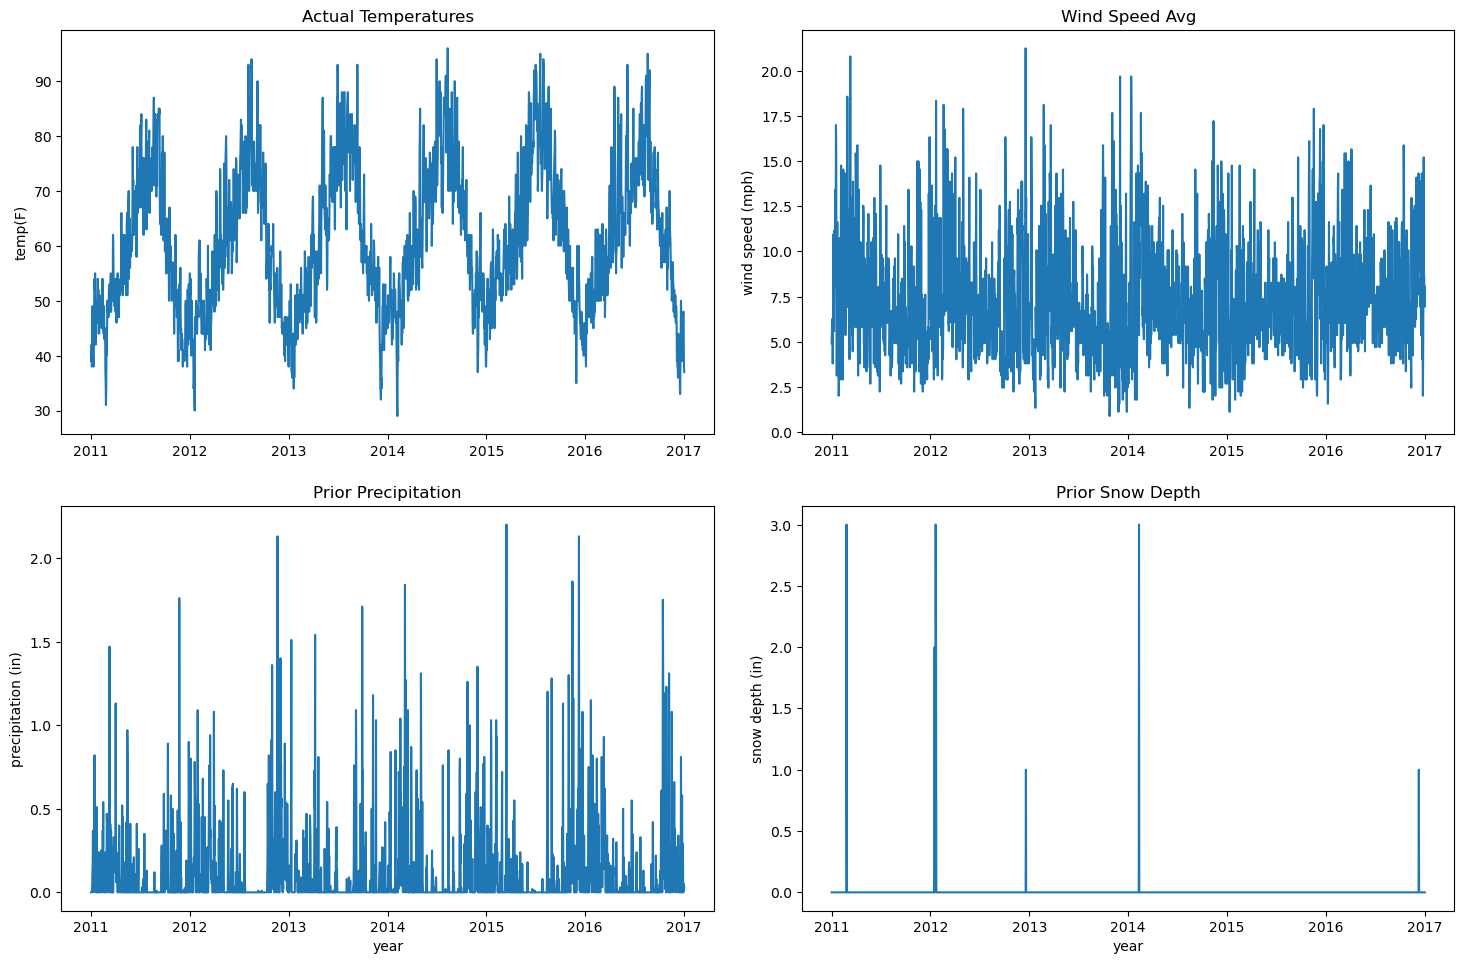

In [271]:
years = df['year']
months = df['month']
days = df['day']

dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15, 10))

ax1.plot(dates, df['actual'])
ax1.set_ylabel('temp(F)'); ax1.set_title('Actual Temperatures')

ax2.plot(dates, df['ws_1'])
ax4.set_xlabel('year'); ax2.set_ylabel('wind speed (mph)'); ax2.set_title('Wind Speed Avg')

ax3.plot(dates, df['prcp_1'])
ax3.set_xlabel('year'); ax3.set_ylabel('precipitation (in)'); ax3.set_title('Prior Precipitation')

ax4.plot(dates, df['snwd_1'])
ax4.set_xlabel('year'); ax4.set_ylabel('snow depth (in)'); ax4.set_title('Prior Snow Depth')

plt.tight_layout(pad = 2)

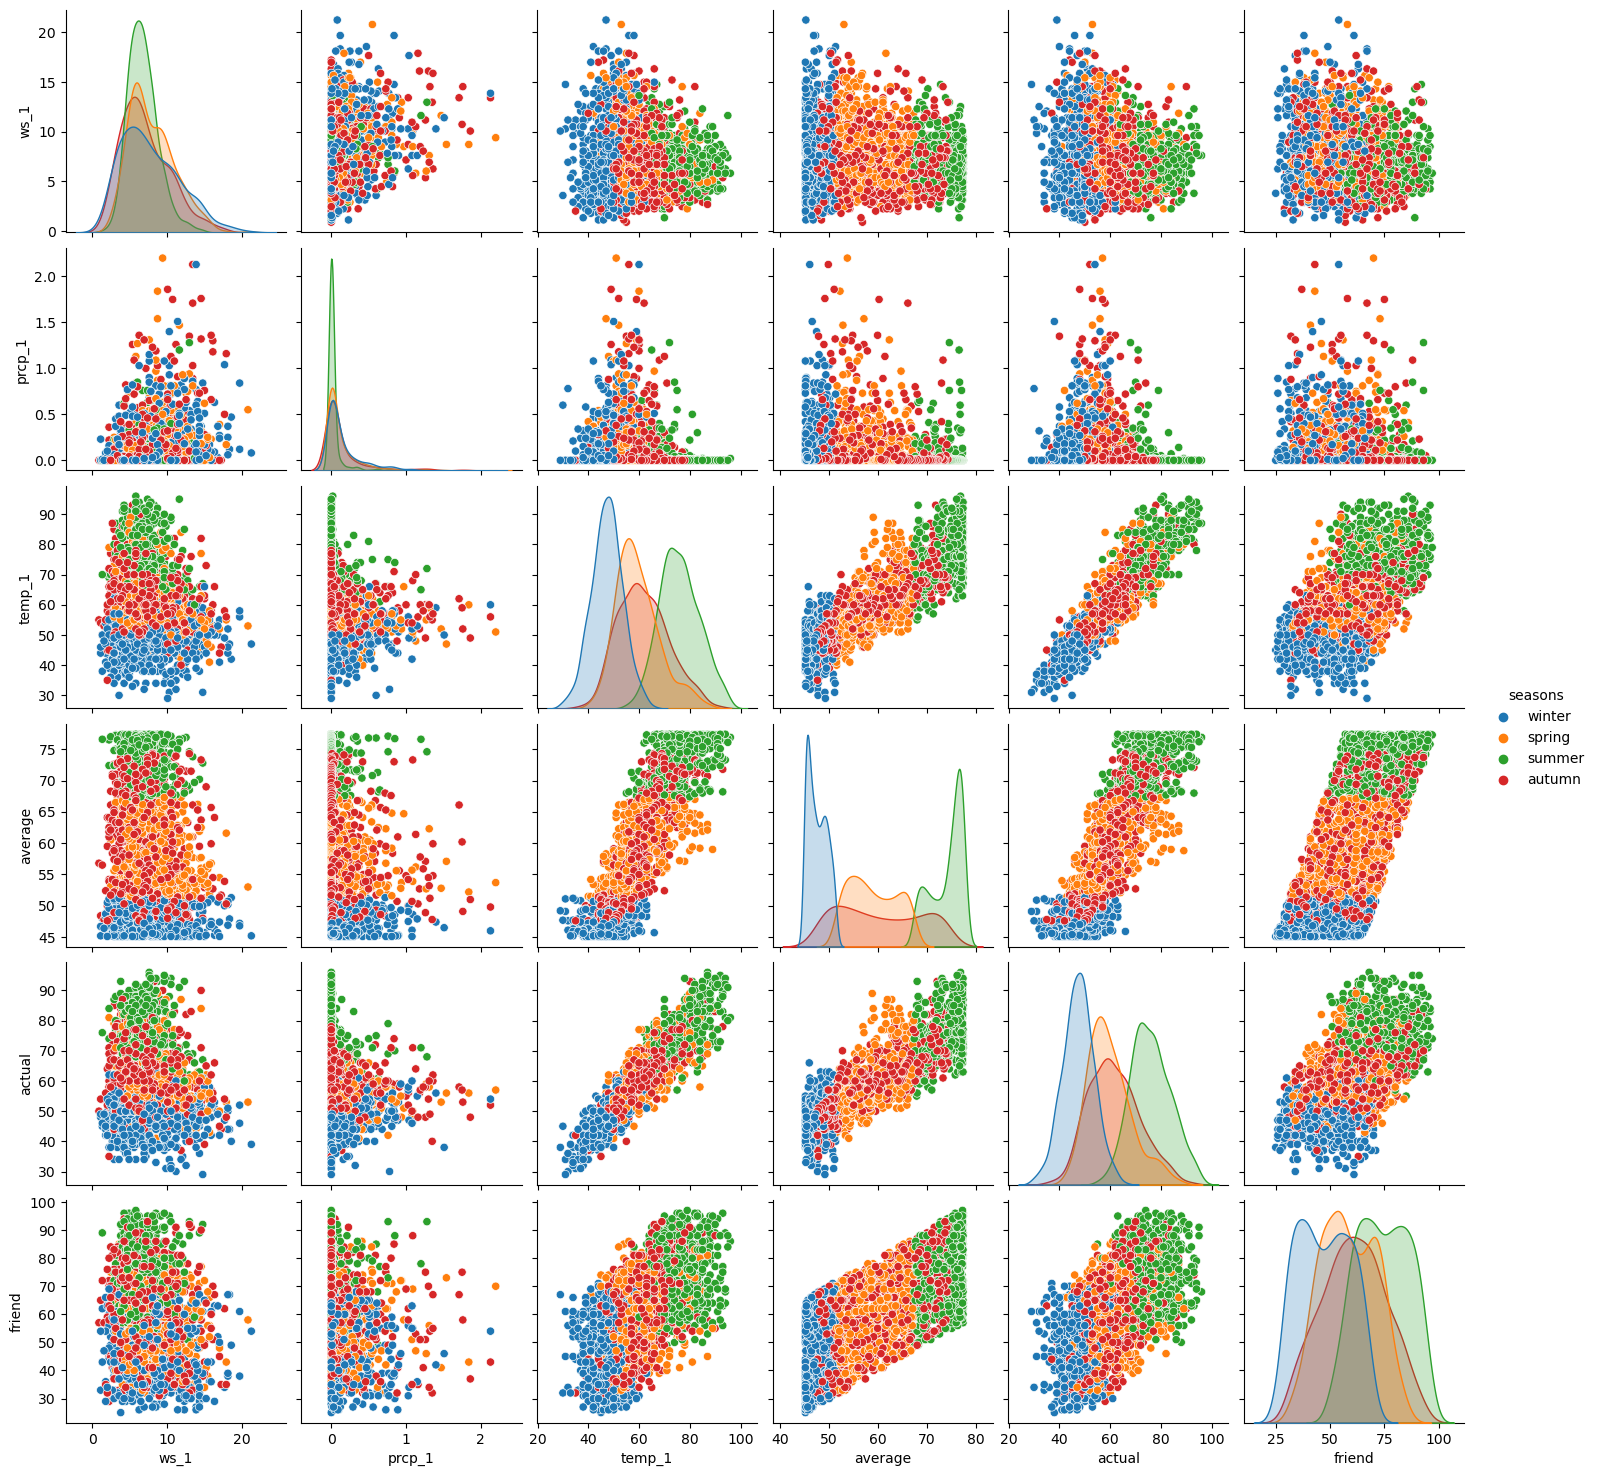

In [307]:
seasons = df.copy()
seasons['seasons'] = seasons['month'].apply(lambda x: 'winter' if x in [1, 2, 12] else (
                                                      'spring' if x in [3, 4, 5] else (
                                                      'summer' if x in [6, 7, 8] else 'autumn')))
seasons.drop(columns = ['day', 'month', 'snwd_1', 'temp_2', 'weekday', 'year'], inplace = True)

sns.pairplot(seasons
             , hue = 'seasons'
             , diag_kind = 'kde'
             )

In [272]:
X = df.drop(columns = ['year', 'month', 'day', 'weekday', 'actual'], axis = 1)
y = df['actual']

x_train, x_test, y_train, y_test = train_test_split(X, y
                                                    , test_size = .3
                                                    , random_state = 11)

### RandomForestRegressor CV

In [280]:
rfr = RandomForestRegressor(random_state = 11)
print('Default setting:')
pprint(rfr.get_params())

Default setting:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 11,
 'verbose': 0,
 'warm_start': False}


In [281]:
n_estimators = [int(n) for n in np.linspace(200, 2000, 10)]
max_features = [1.0, 'sqrt']
max_depth = [int(d) for d in np.linspace(10, 110, 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators' : n_estimators
                , 'max_features' : max_features
                , 'max_depth' : max_depth
                , 'min_samples_split' : min_samples_split
                , 'min_samples_leaf' : min_samples_leaf
                , 'bootstrap' : bootstrap}

In [282]:
rfr = RandomForestRegressor(random_state = 11)
rfr_random = RandomizedSearchCV(estimator = rfr
                               , param_distributions = random_grid
                               , n_iter = 100
                               , cv = 3
                               , verbose = 2
                               , random_state = 11
                               , n_jobs = -1)

rfr_random.fit(x_train, y_train)

print('Best parameters:')
display(rfr_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters:


{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 1.0,
 'max_depth': 10,
 'bootstrap': True}

### RandomForestRegressor: Best parameters

In [296]:
model = RandomForestRegressor(**rfr_random.best_params_)
model.fit(x_train, y_train)
y_pred_model = model.predict(x_test)

mape = abs(100 * (np.sum((y_test - y_pred_model) / y_test) / y_test.shape[0]))

print(f'[model] MAPE: {mape:.2f}%')
print(f'[model] Accuracy: {100 - mape:.2f}%')

[model] MAPE: 0.66%
[model] Accuracy: 99.34%


[UP](#toc)